In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
prices = pd.read_csv('./Fuel-Data/Prices.csv')
fuels = pd.read_csv('./Fuel-Data/Fuel.csv')
observations = pd.read_csv('./Fuel-Data/Observations.csv')
companies = pd.read_csv('./Fuel-Data/Companies.csv')
stations = pd.read_csv('./Fuel-Data/Stations.csv')

In [ ]:
prices.head()

,Observation,FuelCode,Price
0,1,P95,196.9
1,1,PDL,212.9
2,1,U91,188.9
3,1,E10,186.9
4,1,P98,205.9


In [ ]:
prices.Price.describe()

count    52060.000000
mean       197.052451
std         18.877969
min         89.900000
25%        185.900000
50%        197.900000
75%        209.800000
max        259.700000
Name: Price, dtype: float64

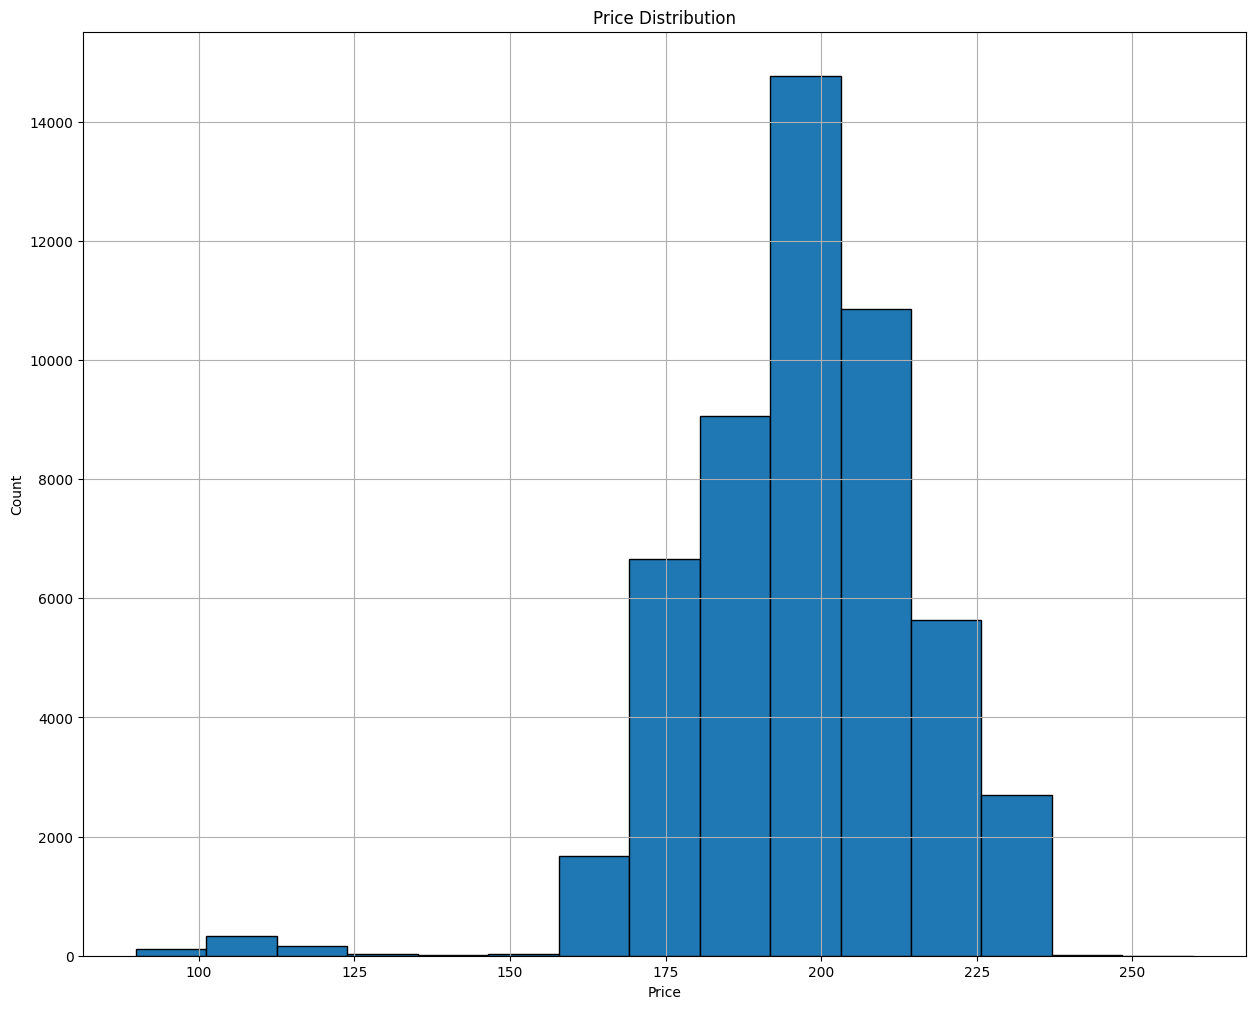

In [ ]:
# Plotting the histogram
plt.figure(figsize=(15, 12))
prices['Price'].hist(bins=15, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

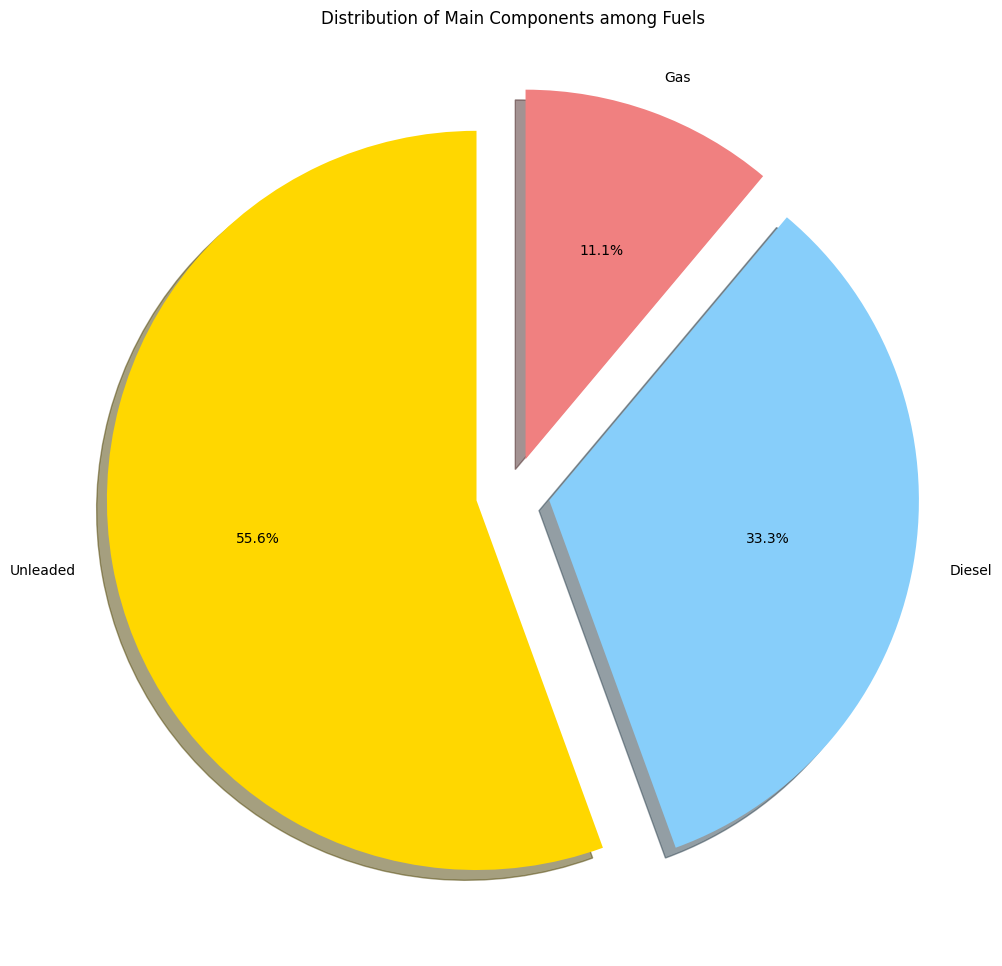

In [ ]:
colors = ['gold', 'lightskyblue', 'lightcoral']

# Pie chart showing the distribution of main components among fuels
plt.figure(figsize=(15, 12))
fuels['MainComponent'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=[0.1] * fuels['MainComponent'].nunique(), shadow=True, colors=colors)
plt.title('Distribution of Main Components among Fuels')
plt.ylabel('')  # remove default 'count' ylabel
plt.show()

In [ ]:
prices.rename(columns={'Observation':'ObservationNo'},inplace=True)
prices.head()

,ObservationNo,FuelCode,Price
0,1,P95,196.9
1,1,PDL,212.9
2,1,U91,188.9
3,1,E10,186.9
4,1,P98,205.9


In [ ]:
combined = pd.merge(observations,prices, on='ObservationNo',how='left')

In [ ]:
combined.head()

,ServiceStationNo,ObservationNo,PriceDate,PriceTime,FuelCode,Price
0,1,1,2023-02-01,00:00,P95,196.9
1,1,1,2023-02-01,00:00,PDL,212.9
2,1,1,2023-02-01,00:00,U91,188.9
3,1,1,2023-02-01,00:00,E10,186.9
4,1,1,2023-02-01,00:00,P98,205.9


In [ ]:
combined['PriceDate'] = pd.to_datetime(combined['PriceDate'])

In [ ]:
fuels.rename(columns={'Fuel':'FuelCode'},inplace=True)

In [ ]:
final = pd.merge(combined, fuels, on='FuelCode', how='left')

,ServiceStationNo,ObservationNo,PriceDate,PriceTime,FuelCode,Price,Name,MainComponent
0,1,1,2023-02-01,00:00,P95,196.9,Premium 95,Unleaded
1,1,1,2023-02-01,00:00,PDL,212.9,Premium Diesel,Diesel
2,1,1,2023-02-01,00:00,U91,188.9,Unleaded 91,Unleaded
3,1,1,2023-02-01,00:00,E10,186.9,Ethanol 94,Unleaded
4,1,1,2023-02-01,00:00,P98,205.9,Premium 98,Unleaded
...,...,...,...,...,...,...,...,...
52055,1,22106,2023-02-28,23:59,PDL,204.9,Premium Diesel,Diesel
52056,1,22106,2023-02-28,23:59,P98,205.9,Premium 98,Unleaded
52057,1,22106,2023-02-28,23:59,U91,188.9,Unleaded 91,Unleaded
52058,1,22106,2023-02-28,23:59,E10,186.9,Ethanol 94,Unleaded


In [ ]:
avg = combined.groupby(['FuelCode']).resample('W-Mon',on='PriceDate')['Price'].mean()
week_avg_price = avg.reset_index()
week_avg_price.columns = ['FuelCode','PriceDate','AvgPrice']
week_avg_price = week_avg_price.dropna()

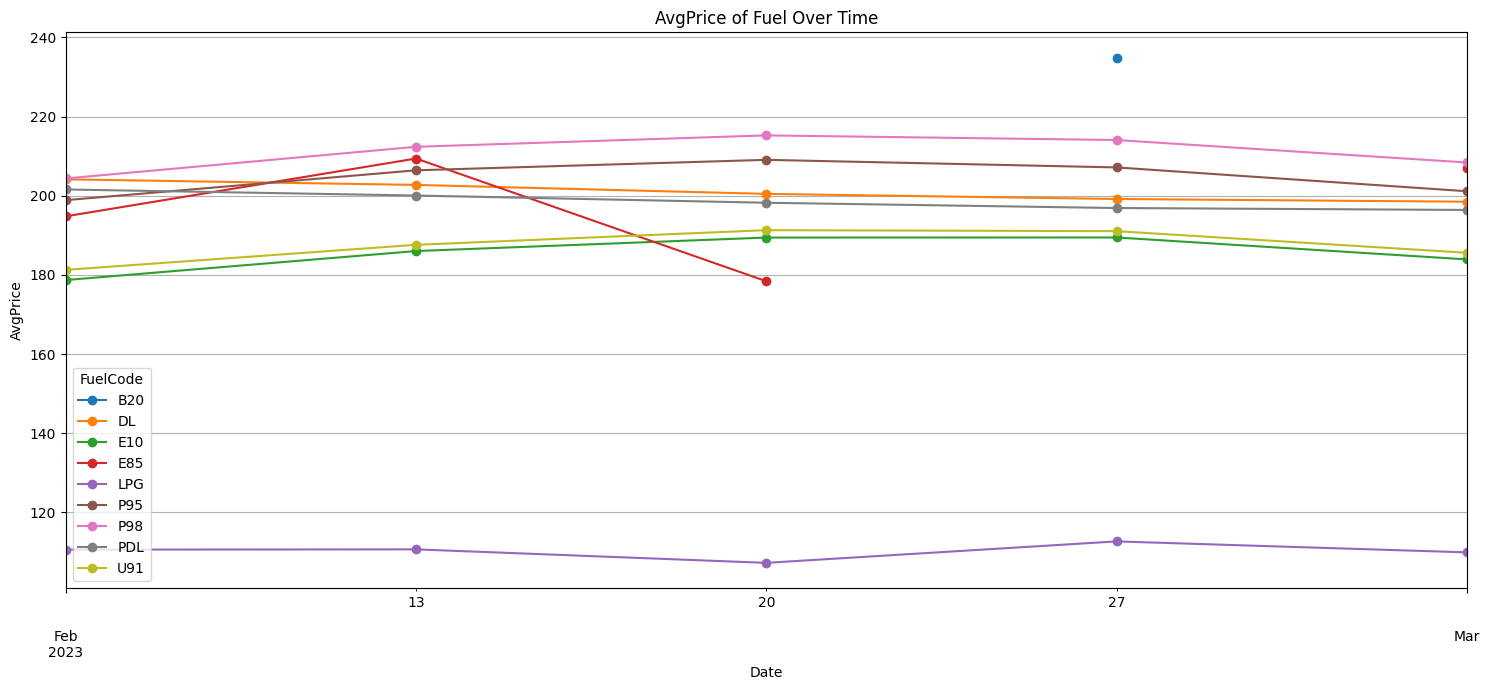

In [ ]:
# Pivot the data to make PriceDate the index, FuelCode the columns, and AvgPrice the values
df = week_avg_price.pivot(index='PriceDate', columns='FuelCode', values='AvgPrice')

# Plot the reshaped data
df.plot(figsize=(15, 7), marker='o')
plt.title('AvgPrice of Fuel Over Time')
plt.ylabel('AvgPrice')
plt.xlabel('Date')
plt.grid(True)
plt.legend(title='FuelCode')
plt.tight_layout()
plt.show()

In [ ]:
stations.head(20)

,ServiceStationNo,ServiceStationName,Address,Suburb,Postcode,Brand
0,1,Metro Petroleum Ballina,"323 River Street, BALLINA NSW 2478",BALLINA,2478,Metro Fuel
1,2,Metro Peakhurst,"114 Boundary Road, PEAKHURST NSW 2210",PEAKHURST,2210,Metro Fuel
2,3,Speedway Mt Pritchard,"348 Elizabeth Dr, MOUNT PRITCHARD NSW 2170",MOUNT PRITCHARD,2170,Speedway
3,4,Speedway Meadows,"359 Elizabeth Drive, Mount Pritchard NSW 2170",Mount Pritchard,2170,Speedway
4,5,BP Greta,"122 High St, GRETA NSW 2334",GRETA,2334,BP
5,6,Budget Bexley,"295 FOREST RD, BEXLEY NSW 2207",BEXLEY,2207,Budget
6,7,Budget Oatley,"12B Oatley Parade, Oatley NSW 2223",Oatley,2223,Budget
7,8,Independent Riverstone,"129 Piccadilly St, Riverstone NSW 2765",Riverstone,2765,Independent
8,9,Metro Cessnock,"102 Wollombi Rd, CESSNOCK NSW 2325",CESSNOCK,2325,Metro Fuel
9,10,Medco Windale,"4 Lake Street, Windale NSW 2306",Windale,2306,Independent


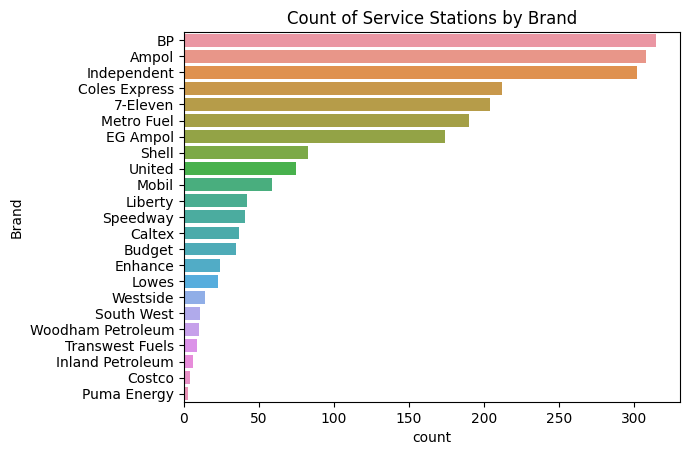

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count of Service Stations by Brand
sns.countplot(data=stations, y='Brand', order = stations['Brand'].value_counts().index)
plt.title("Count of Service Stations by Brand")
plt.show()


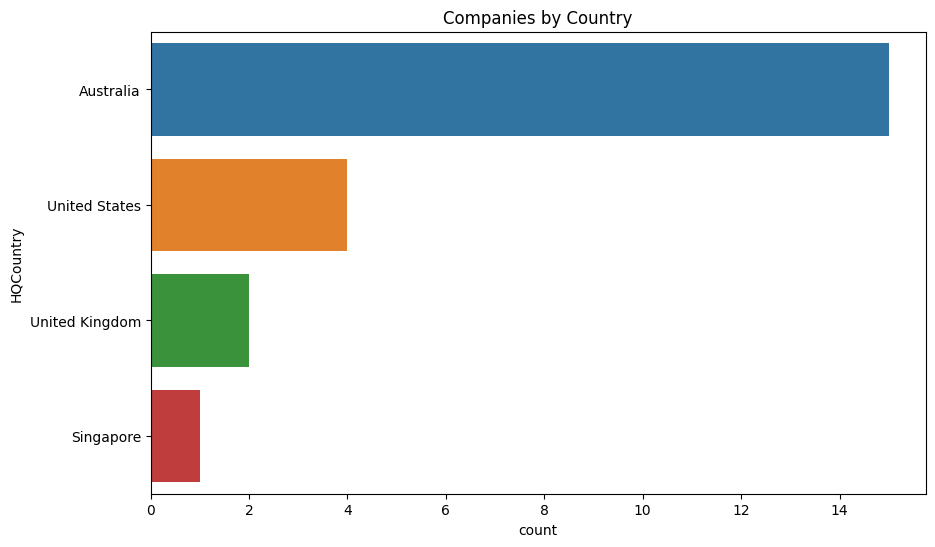

In [ ]:
# 1. Companies by Country
plt.figure(figsize=(10,6))
sns.countplot(data=companies, y='HQCountry', order=companies['HQCountry'].value_counts().index)
plt.title('Companies by Country')
plt.show()

In [ ]:
final.head(10)

,ServiceStationNo,ObservationNo,PriceDate,PriceTime,FuelCode,Price,Name,MainComponent
0,1,1,2023-02-01,00:00,P95,196.9,Premium 95,Unleaded
1,1,1,2023-02-01,00:00,PDL,212.9,Premium Diesel,Diesel
2,1,1,2023-02-01,00:00,U91,188.9,Unleaded 91,Unleaded
3,1,1,2023-02-01,00:00,E10,186.9,Ethanol 94,Unleaded
4,1,1,2023-02-01,00:00,P98,205.9,Premium 98,Unleaded
5,2,2,2023-02-01,00:20,E10,166.7,Ethanol 94,Unleaded
6,2,2,2023-02-01,00:20,PDL,193.9,Premium Diesel,Diesel
7,3,3,2023-02-01,00:59,P98,185.5,Premium 98,Unleaded
8,3,3,2023-02-01,00:59,U91,165.5,Unleaded 91,Unleaded
9,3,3,2023-02-01,00:59,E10,163.5,Ethanol 94,Unleaded


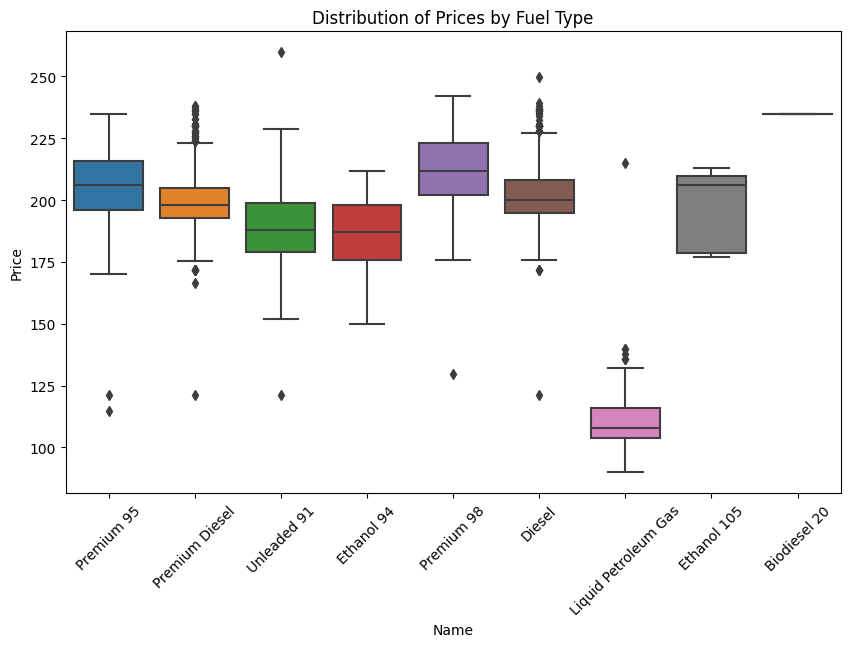

In [ ]:
import seaborn as sns
import numpy as np

# Distribution of Prices for each Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=final, x='Name', y='Price')
plt.title('Distribution of Prices by Fuel Type')
plt.xticks(rotation=45)
plt.show()